# UFO Question 

Our data science team has predicted that the Earth is going to be invaded by an alien force in the
next years. Our only hope is to replicate a device that can block all alien technology in a radius of
~300km. Sadly, the device was sold in 2004 to an anonymous buyer to protect her hometown and
we don't know how contact her again. We know that the device has been active since 2004 in one
city in the USA, and we want to know where to start our search.
We've included a dataset called ​ufo.csv​. This dataset contains over 80,000 reports of UFO sightings
over the last century (all of them verified by the ESA). Using this dataset, try to guess the city in
which the device has been hidden.


In [77]:
# Import libraries
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot  as plt

In [62]:
# Import data
data = pd.read_csv('ufo.csv')

In [63]:
# Select data
data = data[(data.year==2004) | (data.year==2003)]
data.shape

(9879, 14)

In [64]:
# Find the city
q1 = data.copy()

In [65]:
q1.datetime = q1.datetime.apply(erase_string)

In [66]:
def erase_string(s):
    s= str(s)
    s = s[-10:-6]
    return s 

In [67]:

q1 = q1[(q1.datetime == '2004') | (q1.datetime == '2003') ]

In [68]:
freq = q1.city.value_counts()[:20]
freq

tinley park            78
seattle                55
phoenix                49
los angeles            46
portland               40
san diego              37
houston                32
miami                  26
burbank                25
san jose               25
houston (canada)       23
tucson                 23
vancouver (canada)     22
mesa                   22
london (uk/england)    22
toronto (canada)       22
terrace (canada)       21
albuquerque            20
chicago                20
dallas                 20
Name: city, dtype: int64

In [69]:
print(freq[:10])

tinley park    78
seattle        55
phoenix        49
los angeles    46
portland       40
san diego      37
houston        32
miami          26
burbank        25
san jose       25
Name: city, dtype: int64


In [115]:
q1 = q1[q1.country=='us']

In [116]:
def get_month(s):
    s = s.split("/")[0]
    return int(s)

In [117]:
q1['Month'] = q1.date_posted.apply(get_month)

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
tabla = q1.groupby('state',as_index=False).agg({'year':'count', 'Month':'count'})
tabla.head()

,state,year,Month
0,ak,14,14
1,al,42,42
2,ar,67,67
3,az,240,240
4,ca,904,904


In [129]:
%matplotlib inline
pvt_table = q1.pivot_table(index='state', columns=['year'], values=['duration'], fill_value=0, aggfunc='sum')

In [130]:
clean = pvt_table[pvt_table[('duration', 2003)]>pvt_table[('duration', 2004)]]

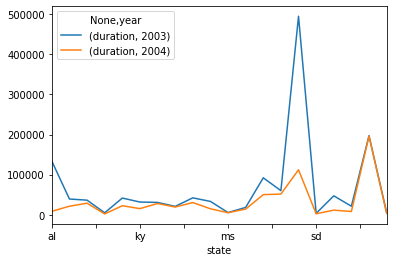

In [131]:
clean.plot();

In [132]:
import seaborn as sns
clean.shape

(20, 2)

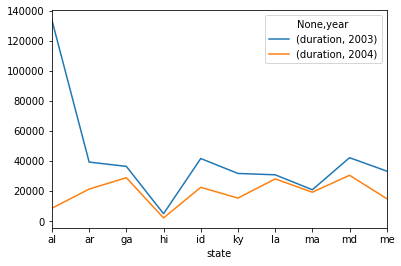

In [149]:
clean[:10].plot();

In [134]:
clean

duration          
year       2003      2004
state                    
al     133595.0    8480.0
ar      39179.0   21225.2
ga      36315.0   28777.0
hi       4815.0    2018.0
id      41555.0   22389.0
ky      31613.0   15208.0
la      30714.0   28006.0
ma      20779.0   19127.0
md      42095.0   30403.0
me      33188.0   14822.0
ms       5417.0    5043.0
mt      18245.0   14057.0
nc      92040.0   50105.0
nm      60013.2   51462.0
oh     494894.7  112086.6
sd       3367.0    2372.0
tn      47098.0   11412.0
ut      21228.0    8060.5
wa     197172.0  195836.5
wy       5715.0    3308.0

In [135]:
#folium.CircleMarker([19.41,-99.16], radius=10, icon=folium.Icon()).add_to(mapa)

In [151]:
mapa= folium.Map(location=[34.09,-118.12],tiles='stamentoner',zoom_start=12)

In [158]:
lat = list(q1.latitude)
long = list(q1.longitude)

In [159]:
lat[0]

34.0952778

In [161]:
for i in range(1,len(lat)):
    folium.CircleMarker([float(lat[i]), float(long[i])], radius=10, icon=folium.Icon()).add_to(mapa)